<a href="https://colab.research.google.com/github/RaoMasood1/Diabetes_Prediction1/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score

In [86]:
import pandas as pd # Data Processing
import numpy as np
df= pd.read_csv('/content/diabetes.csv')

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [89]:
type(df)

pandas.core.frame.DataFrame

In [90]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
371,0,118,64,23,89,0.0,1.731,21,0
194,8,85,55,20,0,24.4,0.136,42,0
63,2,141,58,34,128,25.4,0.699,24,0


In [91]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
df.shape

(768, 9)

In [95]:
df.ndim

2

In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
df.Outcome.nunique()

2

In [98]:
df.Outcome.unique()

array([1, 0])

In [99]:
df["Outcome"].unique()

array([1, 0])

In [100]:
df["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [101]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [102]:
df.Outcome.value_counts(True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [103]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [104]:
df["Outcome"].sample(20)

657    0
610    0
552    0
639    0
665    0
715    1
734    0
63     0
690    0
545    1
388    1
633    0
445    1
64     1
387    1
301    1
617    0
696    1
447    0
554    0
Name: Outcome, dtype: int64

In [105]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Diabetes Prediction')

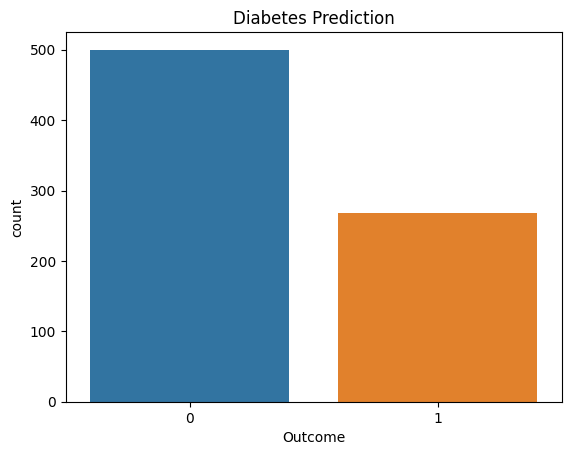

In [106]:
# Show Number of Patient by Stroke
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df , x='Outcome')
plt.title('Diabetes Prediction')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [108]:
df.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
645,2,157,74,35,440,39.4,0.134,30,0
131,9,122,56,0,0,33.3,1.114,33,1
415,3,173,84,33,474,35.7,0.258,22,1
572,3,111,58,31,44,29.5,0.430,22,0
540,8,100,74,40,215,39.4,0.661,43,1
453,2,119,0,0,0,19.6,0.832,72,0
346,1,139,46,19,83,28.7,0.654,22,0
479,4,132,86,31,0,28.0,0.419,63,0
544,1,88,78,29,76,32.0,0.365,29,0
603,7,150,78,29,126,35.2,0.692,54,1


In [109]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [110]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [111]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [112]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [113]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [114]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing data percentage (%):
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [115]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [116]:
cd = pd.DataFrame(cat_features)
cd.head()

""


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  9
********************************************************************************
Numerical Variables Column:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  9
********************************************************************************
Numerical Variables Column:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [121]:
print('*'*10)

**********


In [122]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [123]:
cat_features

[]

In [124]:
df.BMI.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Name: BMI, Length: 768, dtype: bool

In [125]:
df.duplicated().sum()

0

In [126]:
df['Pregnancies'].unique()
df['Pregnancies'].nunique()

17

In [127]:
df['Glucose'].unique()
df['Glucose'].nunique()

136

In [128]:
df['BloodPressure'].unique()
df['BloodPressure'].nunique()

47

In [129]:
df['SkinThickness'].unique()
df['SkinThickness'].nunique()

51

In [130]:
df['Insulin'].unique()
df['Insulin'].nunique()

186

In [131]:
df['BMI'].unique()
df['BMI'].nunique()

248

In [132]:
df['DiabetesPedigreeFunction'].unique()
df['DiabetesPedigreeFunction'].nunique()

517

In [133]:
df['Age'].unique()
df['Age'].nunique()

52

[Text(0.5, 1.0, 'Correlation Matrix')]

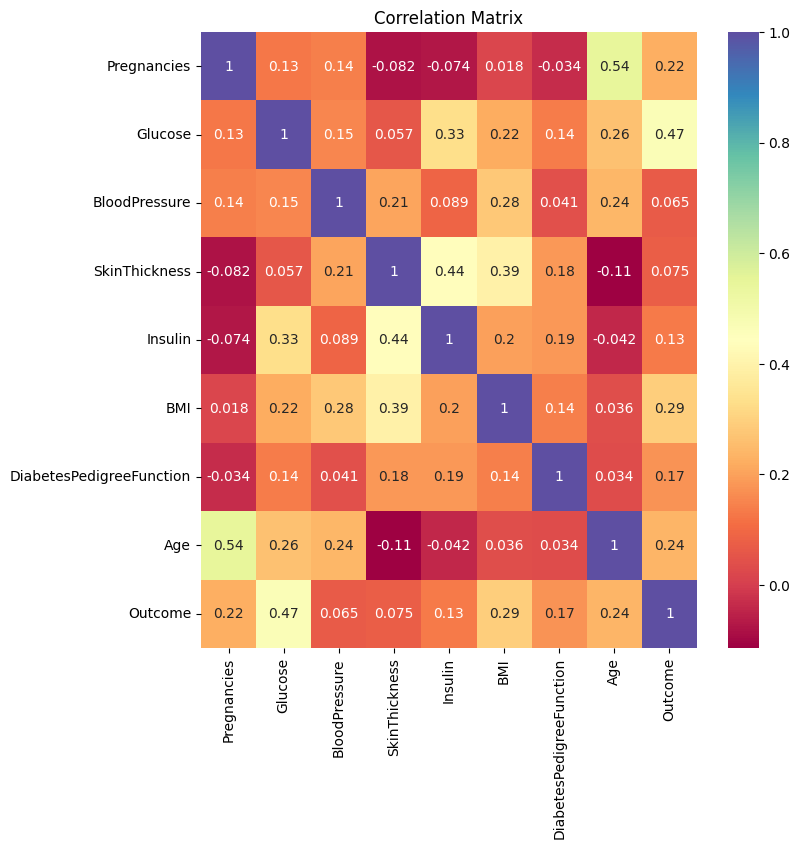

In [134]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

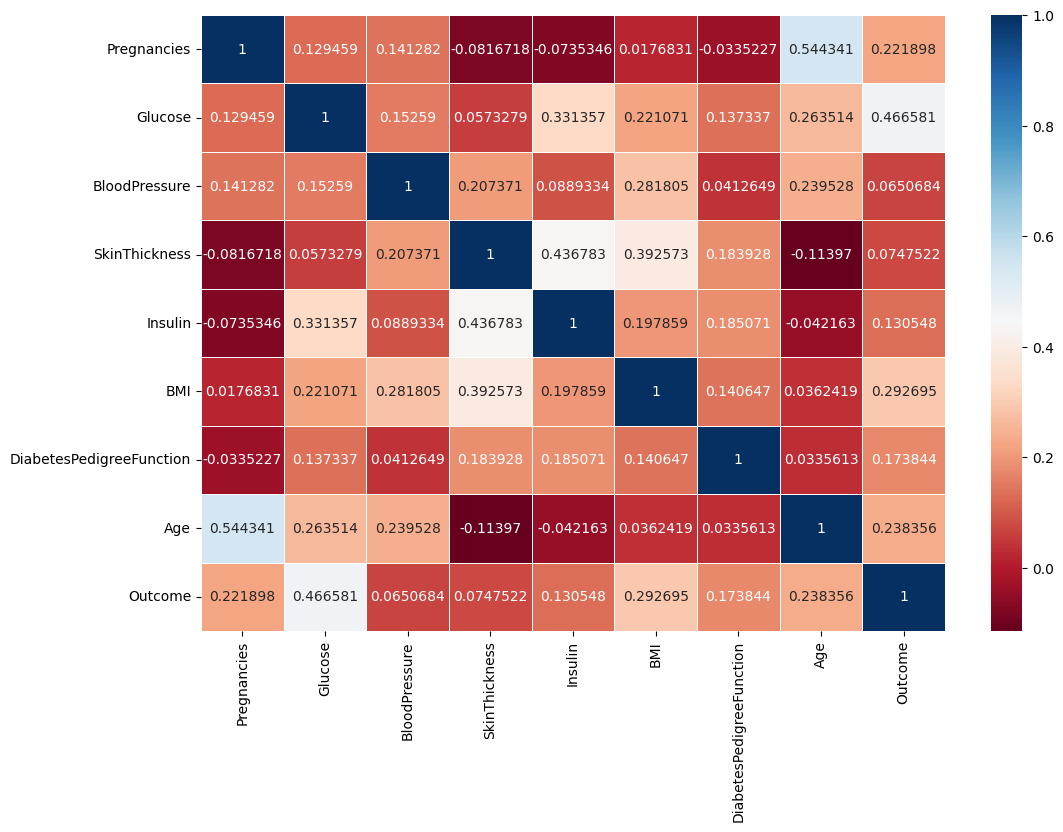

In [135]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [136]:
corr_matrix = df.corr().round(2)
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


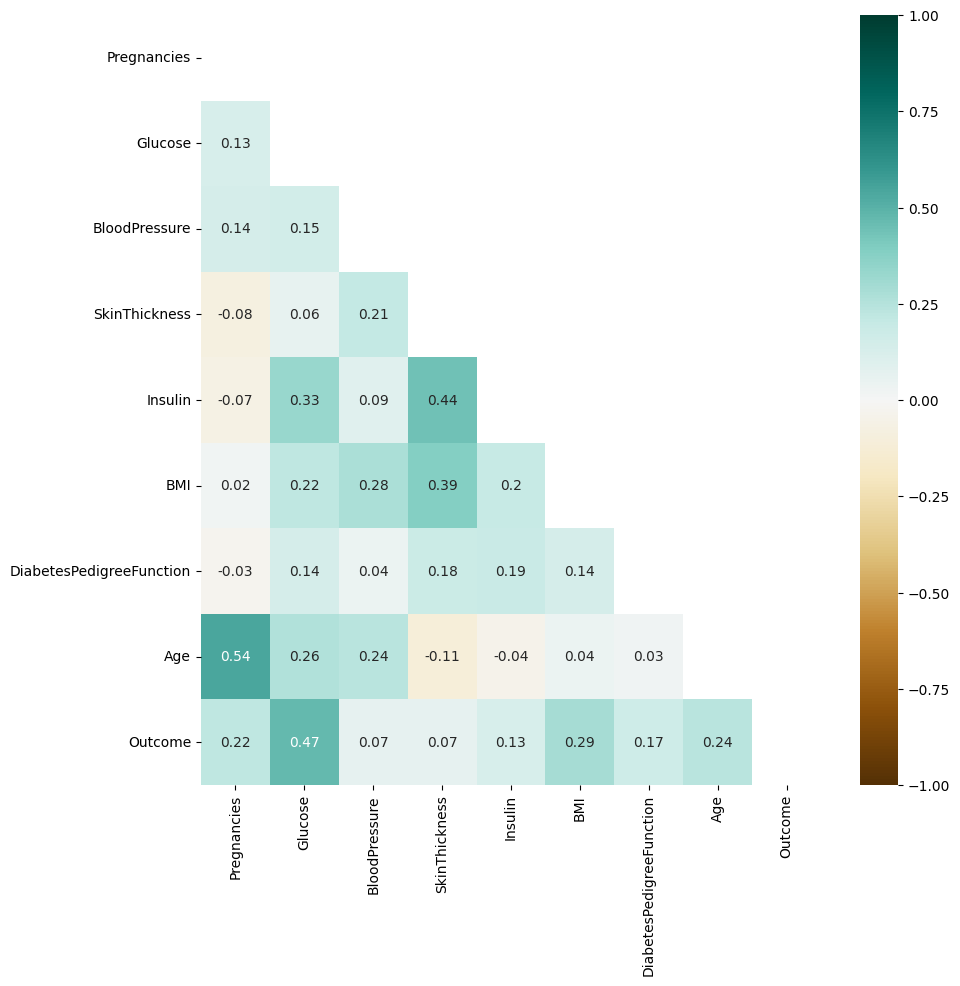

In [137]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [138]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [139]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  9
********************************************************************************
Numerical Variables Column:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [140]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='Outcome',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

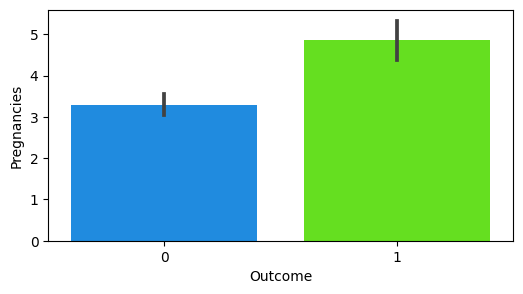

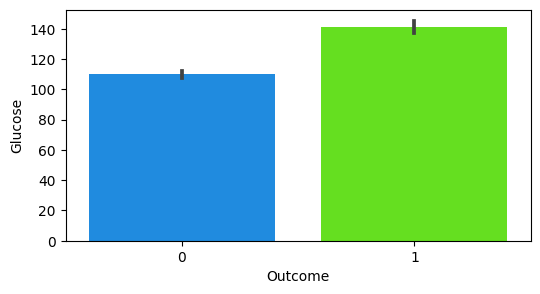

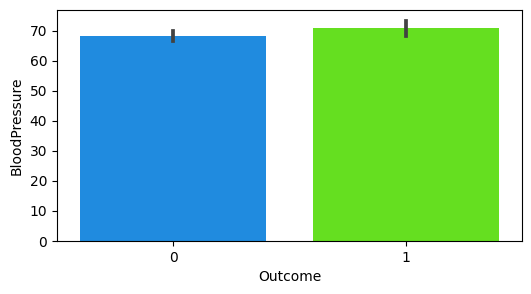

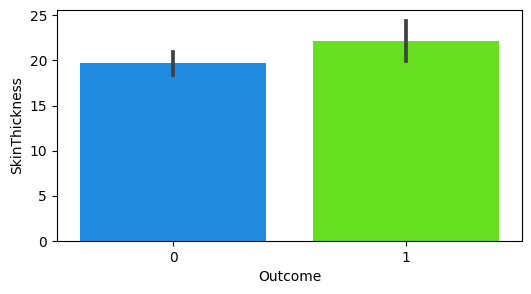

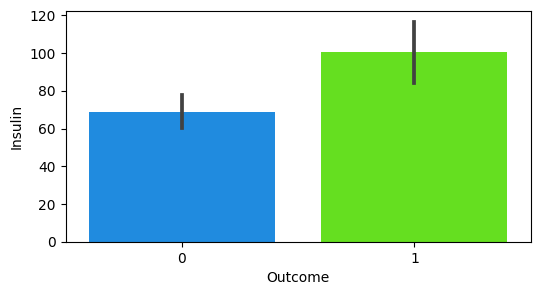

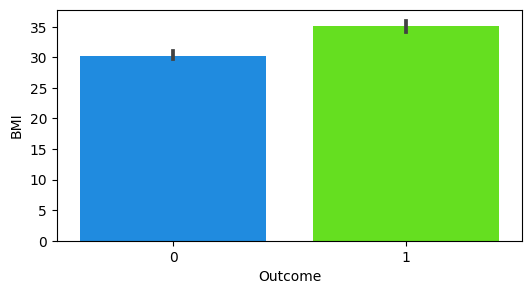

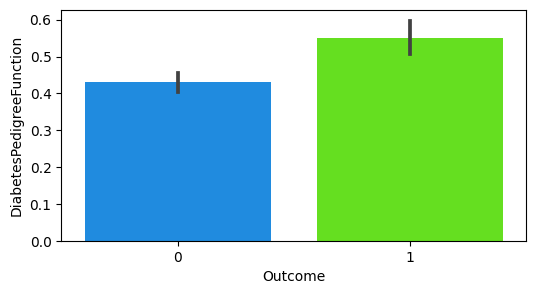

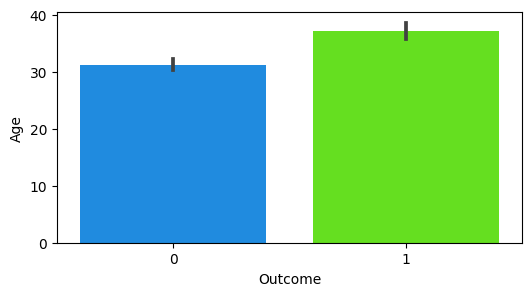

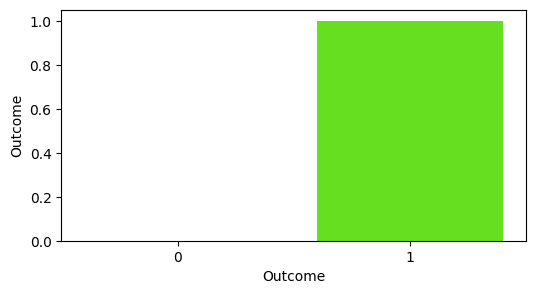

In [141]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='Outcome',y=col,palette='gist_rainbow_r')

In [142]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [144]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [145]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [146]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [147]:
df.shape

(768, 9)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [149]:
train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

In [150]:
train_data_cat.head(3)

""
0
1
2


In [151]:
train_data_num.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [152]:
y = df['Outcome']
x = df.drop('Outcome', axis = 1)

In [153]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [154]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [155]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [157]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [158]:
accuracy = {}

0.7748917748917749
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       147
           1       0.74      0.58      0.65        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



,Actual,Y test predicted
120,1,1
740,1,1
141,0,0
63,0,0
217,0,0
232,0,0
235,1,1
55,0,0
629,0,0
272,0,0


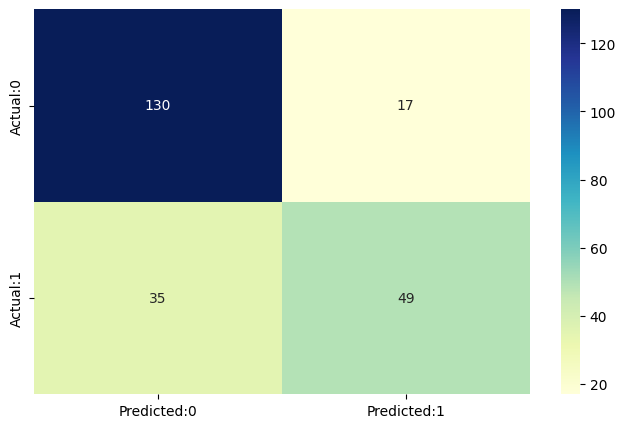

In [159]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression(max_iter=200)
model_logistic.fit(X_train,y_train)

y_pred_logis = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logis))
logistic_acc = accuracy_score(y_test, y_pred_logis)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_logis)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_logis))

y_pred_test = model_logistic.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=200, max_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Info] Number of positive: 184, number of negative: 353
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342644 -> initscore=-0.651532
[LightGBM] [Info] Start training from score -0.651532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

,Actual,Y test predicted
153,0,0
580,1,0
217,0,0
501,0,0
613,0,1
632,0,0
333,0,0
477,0,0
733,0,0
734,0,0


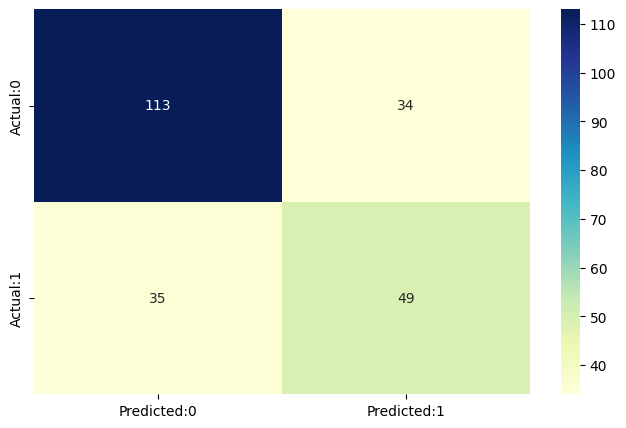

In [160]:
#LightGBM
import lightgbm as lgb
model_gbm= lgb.LGBMClassifier(max_iter=200)
model_gbm.fit(X_train,y_train)

y_pred_gbm = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_gbm))
gbm_accu = accuracy_score(y_test, y_pred_gbm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbm))

y_pred_test = model_gbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7792207792207793
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       147
           1       0.70      0.68      0.69        84

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



,Actual,Y test predicted
632,0,0
594,0,1
318,0,0
602,0,0
232,0,0
54,0,1
425,1,1
63,0,1
412,0,0
430,0,0


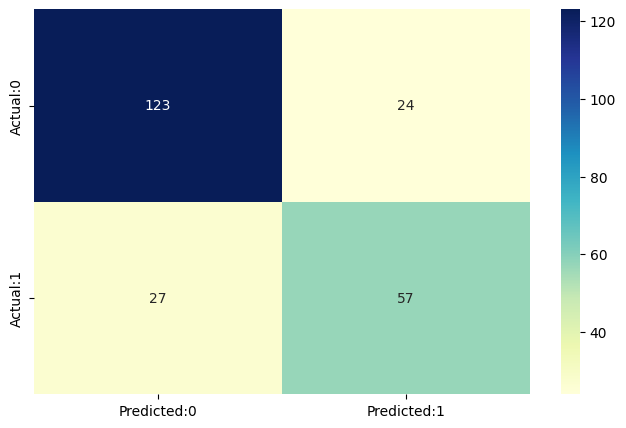

In [161]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

y_pred_gbc = model_gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
gbc_accu = accuracy_score(y_test, y_pred_gbc)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbc)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbc))

y_pred_test = model_gbc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7316017316017316
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       147
           1       0.64      0.58      0.61        84

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



,Actual,Y test predicted
232,0,0
689,1,1
98,0,0
558,0,0
580,1,0
359,1,1
140,0,0
273,0,0
561,1,1
388,1,0


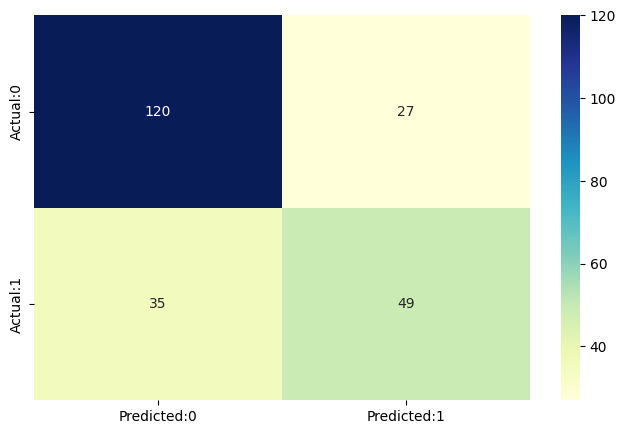

In [162]:
#XGBoost
from xgboost import XGBClassifier
model_xg= XGBClassifier()
model_xg.fit(X_train,y_train)

y_pred_xg = model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred_xg))
xg_accu = accuracy_score(y_test, y_pred_xg)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_xg)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_xg))

y_pred_test = model_xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7619047619047619
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       147
           1       0.70      0.61      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



,Actual,Y test predicted
453,0,0
733,0,0
597,0,0
466,0,0
98,0,0
630,1,0
336,0,1
368,0,0
140,0,0
621,0,0


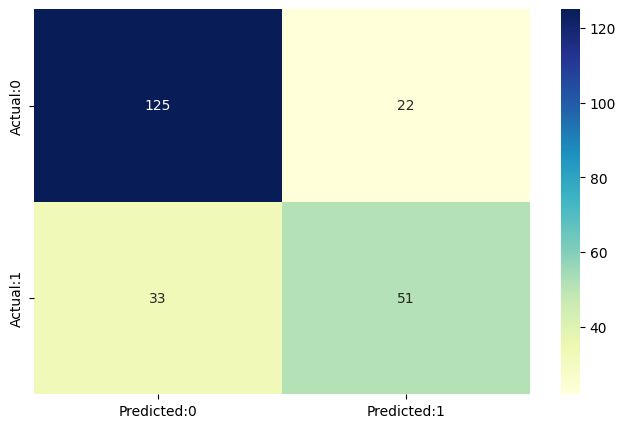

In [163]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_Random= RandomForestClassifier()
model_Random.fit(X_train,y_train)

y_pred_Random= model_Random.predict(X_test)
print(accuracy_score(y_test, y_pred_Random))
rf_accu = accuracy_score(y_test, y_pred_Random)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_Random)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_Random))

y_pred_test = model_Random.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7316017316017316
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       147
           1       0.64      0.60      0.62        84

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.73      0.73       231



,Actual,Y test predicted
280,1,0
25,1,1
140,0,0
501,0,0
379,0,0
375,1,0
24,1,1
618,1,1
228,0,1
620,0,0


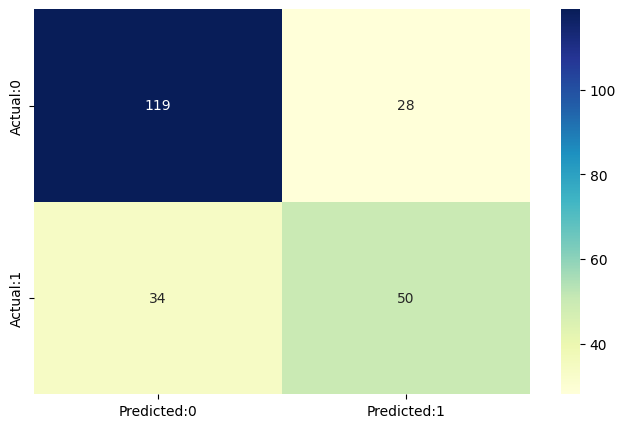

In [164]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree= model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
tree_accu = accuracy_score(y_test, y_pred_tree)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_tree))

y_pred_test = model_tree.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       147
           1       0.60      0.54      0.57        84

    accuracy                           0.70       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



,Actual,Y test predicted
547,0,0
188,1,1
316,0,0
595,1,1
179,1,0
478,0,0
57,0,1
602,0,0
53,1,1
193,1,1


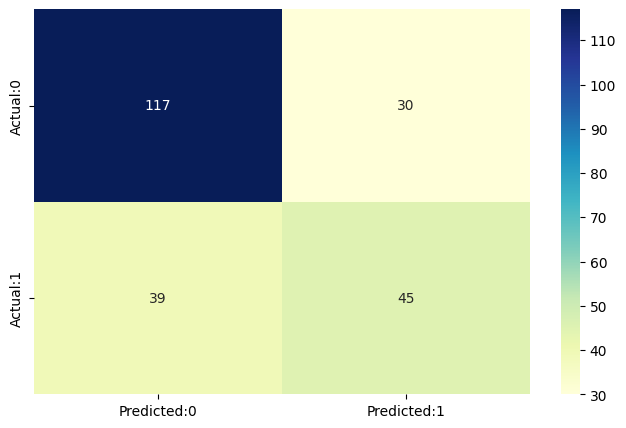

In [165]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

y_pred_knn= model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
knn_accu = accuracy_score(y_test, y_pred_knn)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_knn)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_knn))

y_pred_test = model_knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7792207792207793
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       147
           1       0.74      0.61      0.67        84

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



,Actual,Y test predicted
740,1,1
561,1,1
261,1,1
463,0,0
272,0,0
530,0,0
134,0,0
392,0,0
244,0,0
695,1,1


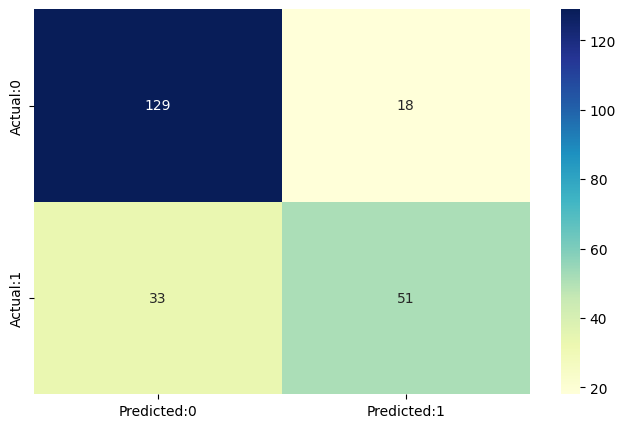

In [166]:
#SVM
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)

y_pred_svm= model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
svm_accu = accuracy_score(y_test, y_pred_svm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_svm))

y_pred_test = model_svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

In [167]:
accuracy

{}

#Graph without SMOTE

Text(0, 0.5, 'Accuracy')

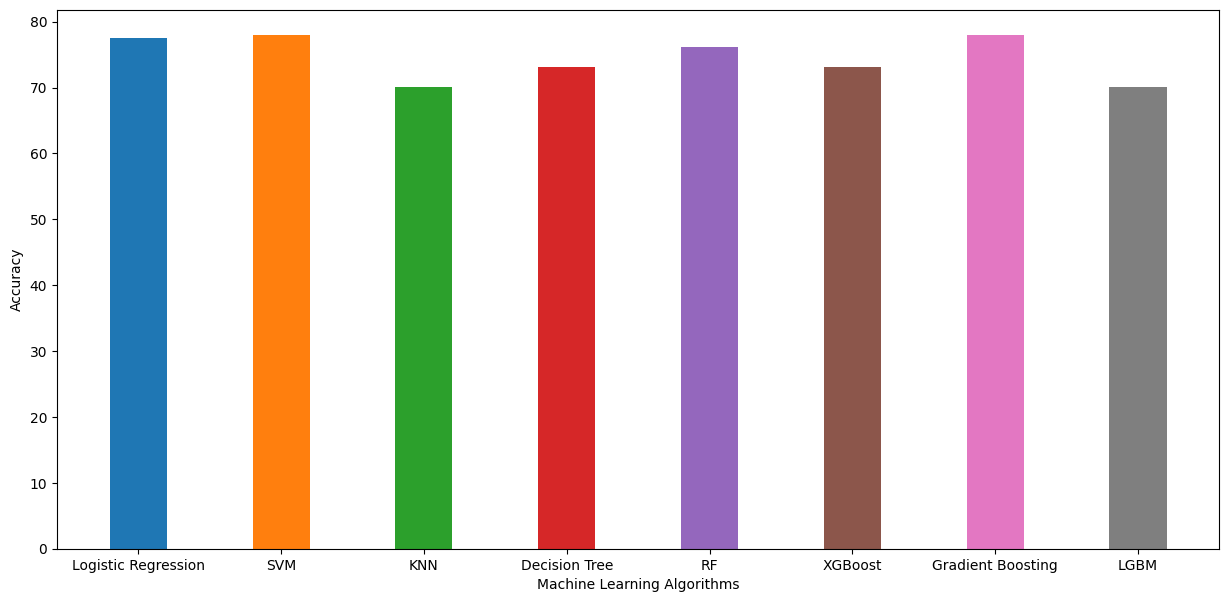

In [168]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

#Handling With SMOTE

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())

1    500
0    500
Name: Outcome, dtype: int64


In [171]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True',random_state = 3)

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


0.7633333333333333
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       139
           1       0.80      0.74      0.77       161

    accuracy                           0.76       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.77      0.76      0.76       300



,Actual,Y test predicted
642,1,1
762,0,0
909,1,0
199,1,0
586,1,1


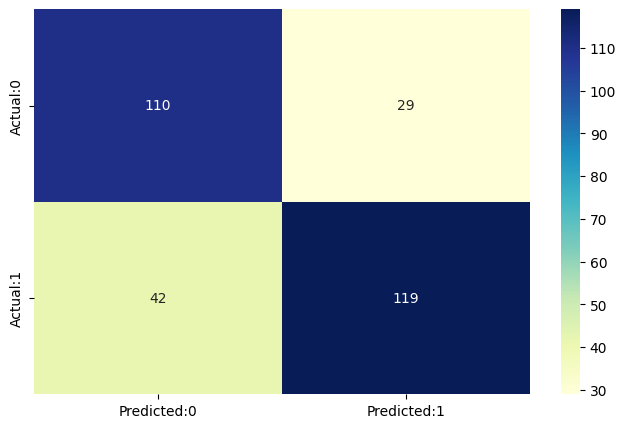

In [173]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
logis_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.77
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       139
           1       0.79      0.77      0.78       161

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



,Actual,Y test predicted
642,1,1
762,0,0
909,1,0
199,1,0
586,1,1


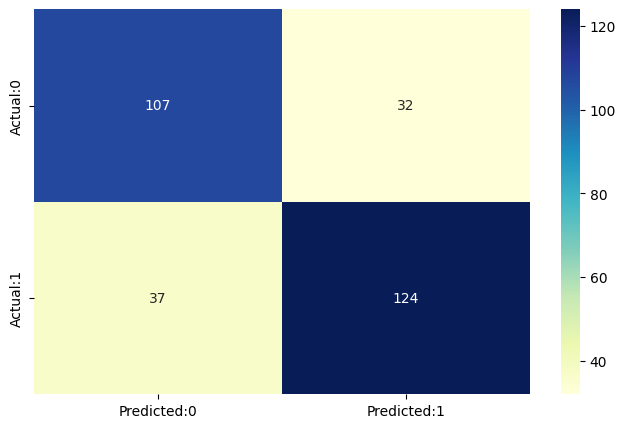

In [174]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
svm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7766666666666666
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       139
           1       0.77      0.83      0.80       161

    accuracy                           0.78       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.78      0.78       300



,Actual,Y test predicted
642,1,1
762,0,0
909,1,1
199,1,1
586,1,1


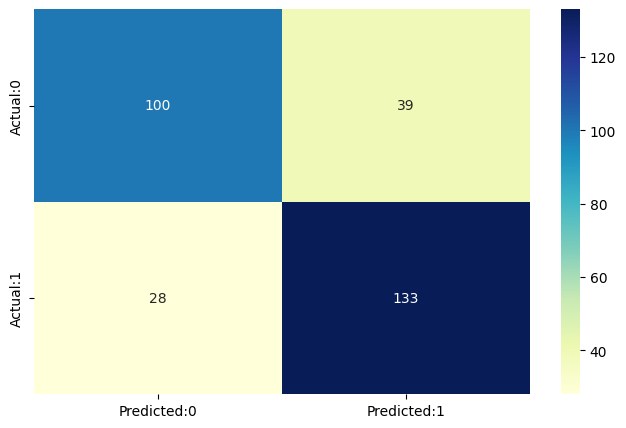

In [175]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred1))
knn_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.77
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       139
           1       0.81      0.75      0.78       161

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



,Actual,Y test predicted
642,1,0
762,0,0
909,1,1
199,1,0
586,1,0


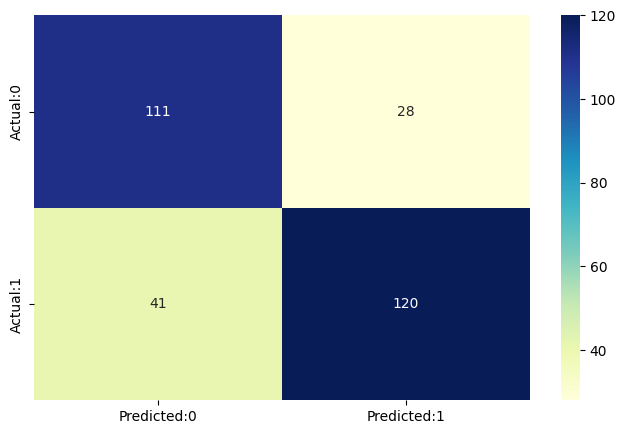

In [176]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
dt_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = dt.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7566666666666667
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       139
           1       0.79      0.74      0.77       161

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



,Actual,Y test predicted
642,1,0
762,0,0
909,1,1
199,1,0
586,1,0


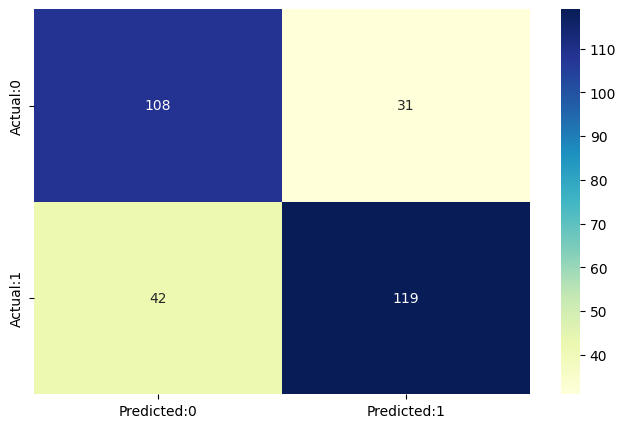

In [177]:
rf= DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
rf_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = rf.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8133333333333334
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       139
           1       0.86      0.78      0.82       161

    accuracy                           0.81       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.82      0.81      0.81       300



,Actual,Y test predicted
642,1,0
762,0,0
909,1,1
199,1,0
586,1,0


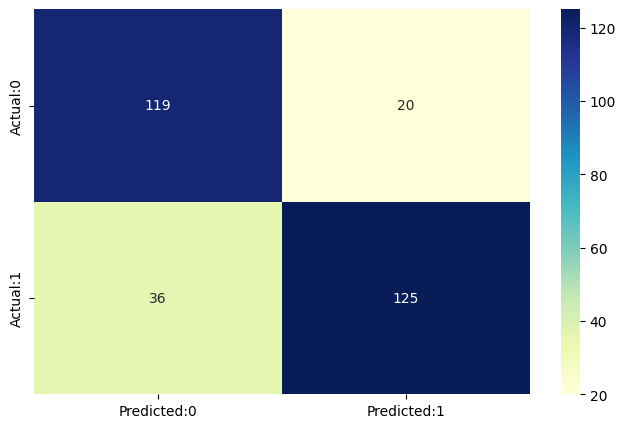

In [178]:
xg= XGBClassifier()
xg.fit(X_train, y_train)
y_pred1 = xg.predict(X_test)
print(accuracy_score(y_test, y_pred1))
xg_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8133333333333334
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       139
           1       0.84      0.80      0.82       161

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



,Actual,Y test predicted
642,1,1
762,0,0
909,1,1
199,1,0
586,1,1


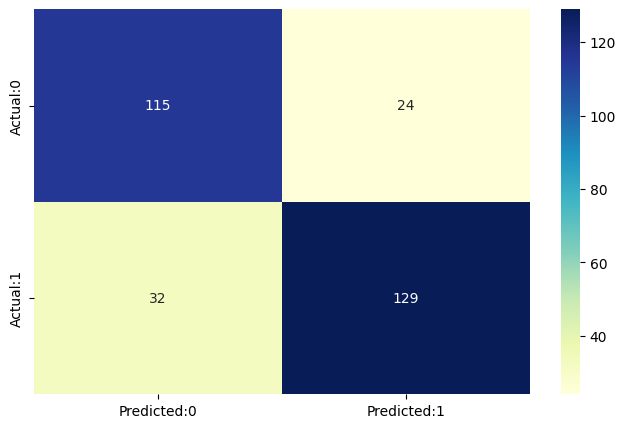

In [179]:
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
gb_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = gb.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

[LightGBM] [Info] Number of positive: 339, number of negative: 361
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484286 -> initscore=-0.062878
[LightGBM] [Info] Start training from score -0.062878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,Actual,Y test predicted
642,1,0
762,0,0
909,1,1
199,1,0
586,1,1


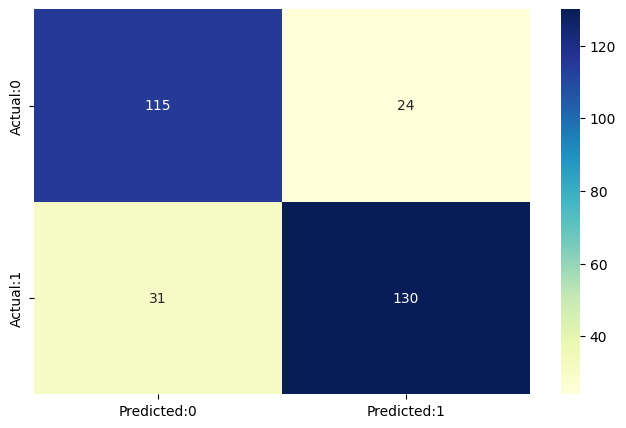

In [180]:
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred1 = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
lgbm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lgbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

#Graph With SMOTE

Text(0, 0.5, 'Accuracy')

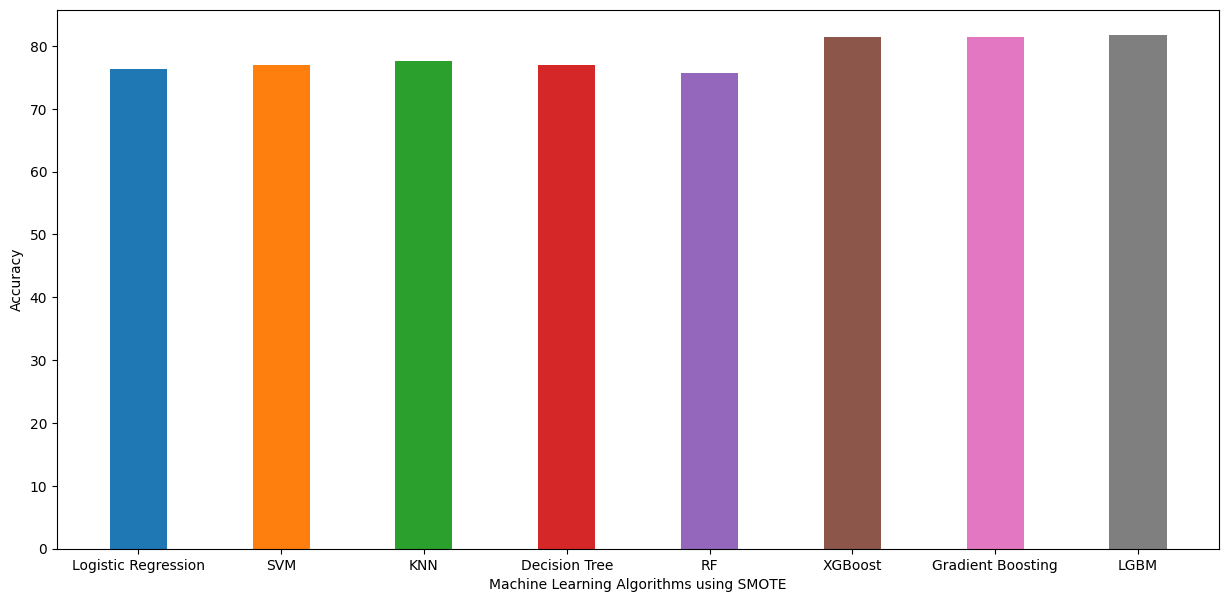

In [181]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')

#Graph of Both(With and Without SMOTE)

Text(0, 0.5, 'Accuracy')

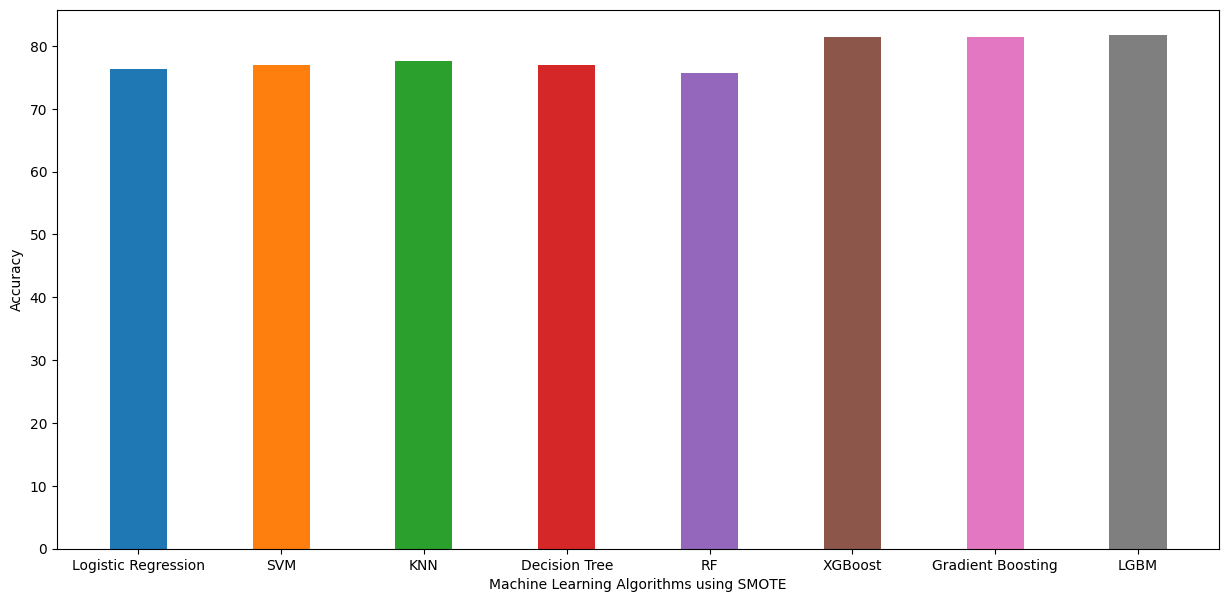

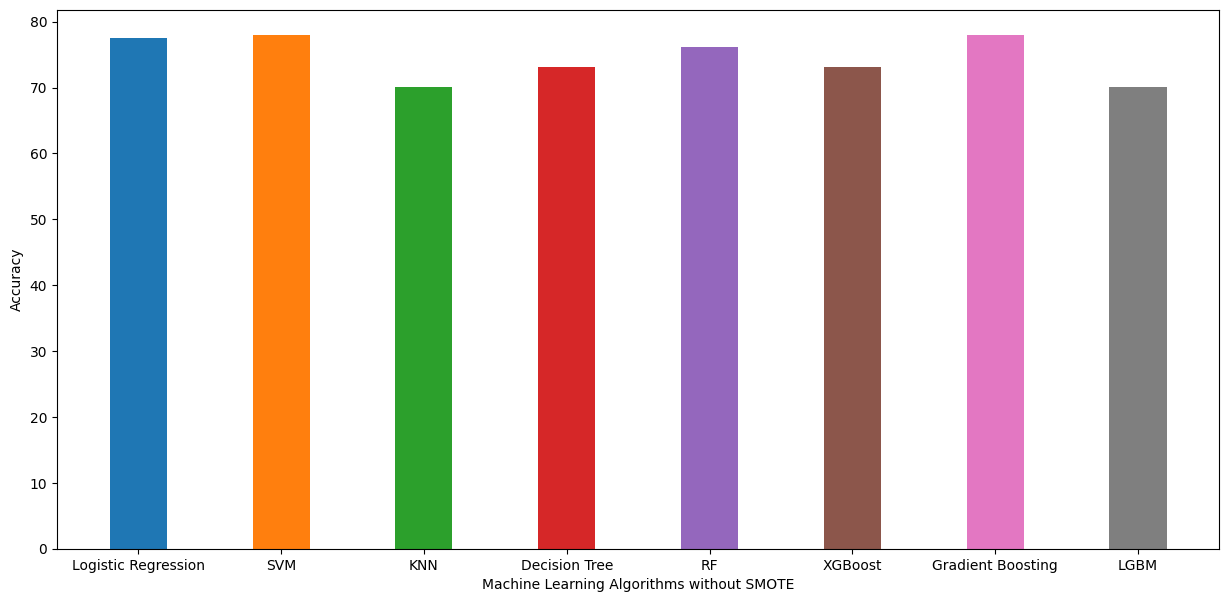

In [182]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')


plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms without SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

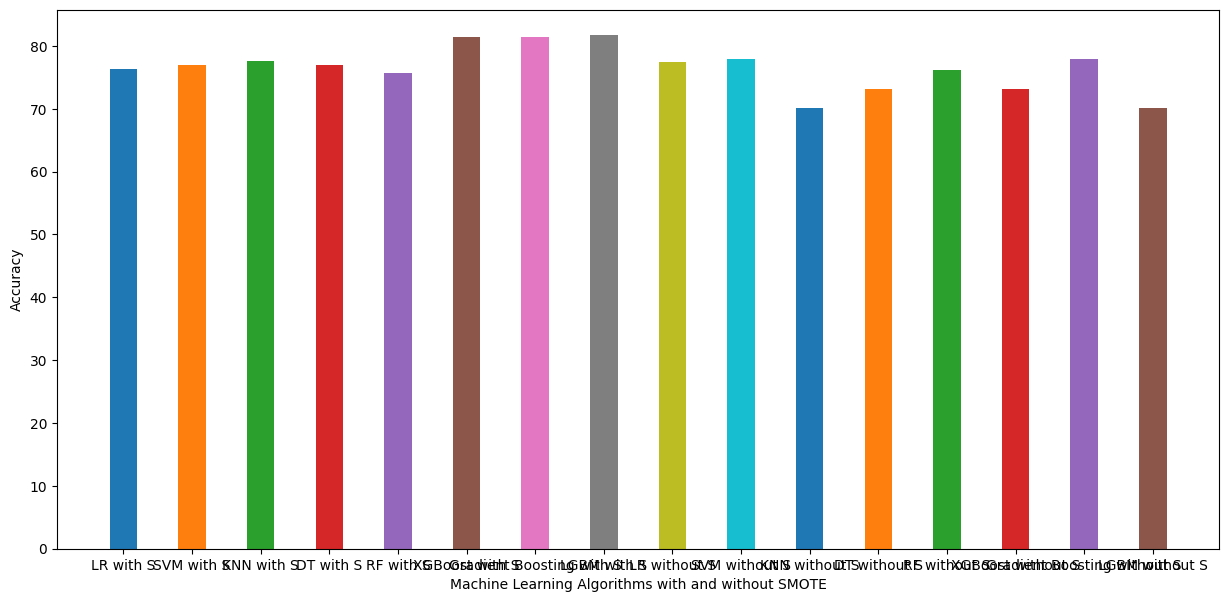

In [183]:
plt.figure(figsize=(15,7))
plt.bar("LR with S", logis_acc1 , width=0.4)
plt.bar("SVM with S", svm_acc1, width=0.4)
plt.bar("KNN with S",knn_acc1,width=0.4)
plt.bar("DT with S", dt_acc1 ,width=0.4)
plt.bar("RF with S", rf_acc1,width=0.4)
plt.bar("XGBoost with S", xg_acc1,width=0.4)
plt.bar("Gradient Boosting with S", gb_acc1,width=0.4)
plt.bar("LGBM with S",lgbm_acc1,width=0.4)
plt.bar("LR without S", logistic_acc, width=0.4)
plt.bar("SVM without S", svm_accu, width=0.4)
plt.bar("KNN without S",knn_accu,width=0.4)
plt.bar("DT without S", tree_accu,width=0.4)
plt.bar("RF without S", rf_accu,width=0.4)
plt.bar("XGBoost without S", xg_accu,width=0.4)
plt.bar("Gradient Boosting without S", gbc_accu,width=0.4)
plt.bar("LGBM without S",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms with and without SMOTE')
plt.ylabel('Accuracy')

#Print Accuracy Without SMOTE and With SMOTE

In [184]:
print("Logistic Regression", logistic_acc)
print("Logistic Regression with S", logis_acc1 )
print("SVM", svm_accu)
print("SVM with S", svm_acc1)
print("KNN",knn_accu)
print("KNN with S",knn_acc1)
print("Decision Tree", tree_accu)
print("Decision Tree with S", dt_acc1 )
print("Random Forest", rf_accu)
print("Random Forest with S", rf_acc1)
print("XGBoost", xg_accu)
print("XGBoost with S", xg_acc1)
print("Gradient Boosting", gbc_accu)
print("Gradient Boosting with S", gb_acc1)
print("LGBM",gbm_accu)
print("LGBM with S",lgbm_acc1)

Logistic Regression 77.48917748917748
Logistic Regression with S 76.33333333333333
SVM 77.92207792207793
SVM with S 77.0
KNN 70.12987012987013
KNN with S 77.66666666666666
Decision Tree 73.16017316017316
Decision Tree with S 77.0
Random Forest 76.19047619047619
Random Forest with S 75.66666666666667
XGBoost 73.16017316017316
XGBoost with S 81.33333333333333
Gradient Boosting 77.92207792207793
Gradient Boosting with S 81.33333333333333
LGBM 70.12987012987013
LGBM with S 81.66666666666667
